In [1]:
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, datetime
from multiprocessing.spawn import import_main_path
from keras.preprocessing.sequence import TimeseriesGenerator
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np



In [2]:
tickers = ["ANTM.JK","ASII.JK","ICBP.JK","JSMR.JK"]

today = date.today()
# print(today)
start_date = '2010-01-01'
end_date = '2022-06-27'

panel_data = data.DataReader(tickers,'yahoo',start_date, end_date)
panel_data.head(5)


Attributes    Adj Close                                               Close  \
Symbols         ANTM.JK      ASII.JK      ICBP.JK      JSMR.JK      ANTM.JK   
Date                                                                          
2010-01-04  1576.277466  2454.149170  1443.428467  1530.937988  1931.946777   
2010-01-05  1576.277466  2468.053711  1472.885986  1547.488525  1931.946777   
2010-01-06  1576.277466  2454.149170  1463.066772  1555.763916  1931.946777   
2010-01-07  1610.544067  2377.674316  1472.885986  1547.488525  1973.945557   
2010-01-08  1610.544067  2391.578613  1482.705200  1539.213379  1973.945557   

Attributes                                      High          ...     Low  \
Symbols    ASII.JK ICBP.JK      JSMR.JK      ANTM.JK ASII.JK  ... ICBP.JK   
Date                                                          ...           
2010-01-04  3530.0  1837.5  1845.677368  1931.946777  3550.0  ...  1762.5   
2010-01-05  3550.0  1875.0  1865.630737  1994.945068  3570.0  ...  1825.0   
2010-01-06  3530.0  1862.5  1875.607300  1994.945068  3580.0  ...  1862.5   
2010-01-07  3420.0  1875.0  1865.630737  1994.945068  3560.0  ...  1862.5   
2010-01-08  3440.0  1887.5  1855.654053  1994.945068  3450.0  ...  1862.5   

Attributes                      Open                                   Volume  \
Symbols         JSMR.JK      ANTM.JK ASII.JK ICBP.JK      JSMR.JK     ANTM.JK   
Date                                                                            
2010-01-04  1805.770874  1931.946777  3530.0  1787.5  1845.677368  39619544.0   
2010-01-05  1845.677368  1931.946777  3550.0  1875.0  1865.630737  62041590.0   
2010-01-06  1855.654053  1931.946777  3530.0  1900.0  1875.607300  30916328.0   
2010-01-07  1845.677368  1973.945557  3420.0  1875.0  1865.630737  30624653.0   
2010-01-08  1845.677368  1973.945557  3440.0  1900.0  1855.654053  15857579.0   

Attributes                                 
Symbols    ASII.JK     ICBP.JK    JSMR.JK  
Date                                       
2010-01-04    40.0  26442000.0  6978806.0  
2010-01-05    40.0  42874000.0  7988164.0  
2010-01-06    40.0  44946000.0  7538113.0  
2010-01-07    40.0  24863000.0  2048787.0  
2010-01-08    40.0  19118000.0  2441705.0  

[5 rows x 24 columns]

In [3]:
data_close = panel_data["Close"]
data_close.head(5).round(2)

Symbols,ANTM.JK,ASII.JK,ICBP.JK,JSMR.JK
Date,,,,
2010-01-04,1931.95,3530.0,1837.5,1845.68
2010-01-05,1931.95,3550.0,1875.0,1865.63
2010-01-06,1931.95,3530.0,1862.5,1875.61
2010-01-07,1973.95,3420.0,1875.0,1865.63
2010-01-08,1973.95,3440.0,1887.5,1855.65


In [4]:
data_close.describe().round(2)

Symbols,ANTM.JK,ASII.JK,ICBP.JK,JSMR.JK
count,3091.00,3091.00,3091.00,3091.00
mean,1184.22,6690.25,6757.51,4781.62
std,606.62,1199.57,2857.67,1180.73
min,287.00,3280.00,1675.00,1686.05
25%,760.09,5850.00,4050.00,3965.71
50%,957.57,6900.00,7562.50,4863.61
75%,1612.76,7575.00,8850.00,5686.68
max,3190.00,9150.00,12400.00,7183.18


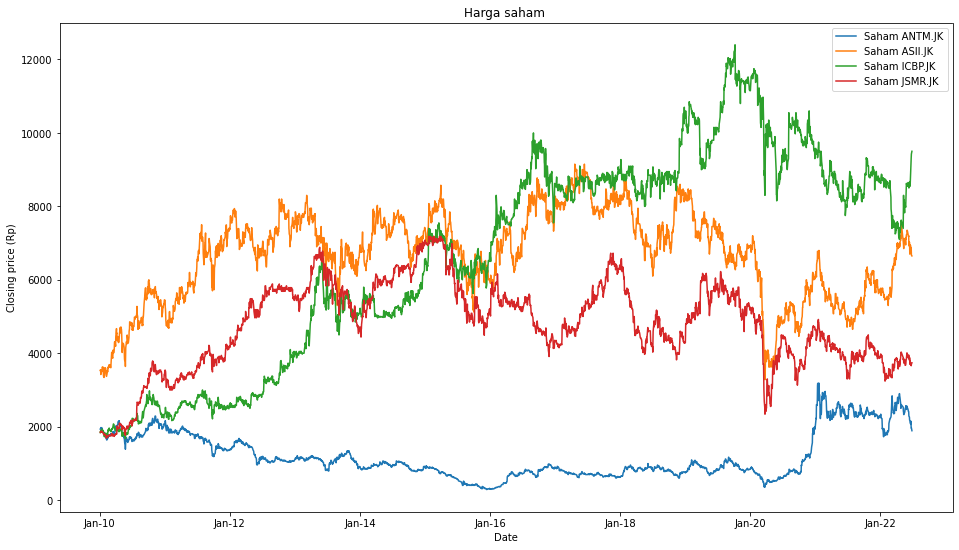

In [5]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

for name in tickers:
    ax.plot(data_close[name].index, data_close[name], label='Saham {}'.format(name))


# Define the date format
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)

ax.set_title('Harga saham ')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (Rp)')
ax.legend()

In [6]:
list(data_close)
data_close.columns = ['antm', 'asii', 'icbp', 'jsmr']
data_close

,antm,asii,icbp,jsmr
Date,,,,
2010-01-04,1931.946777,3530.0,1837.5,1845.677368
2010-01-05,1931.946777,3550.0,1875.0,1865.630737
2010-01-06,1931.946777,3530.0,1862.5,1875.607300
2010-01-07,1973.945557,3420.0,1875.0,1865.630737
2010-01-08,1973.945557,3440.0,1887.5,1855.654053
...,...,...,...,...
2022-06-21,2150.000000,6850.0,9150.0,3690.000000
2022-06-22,2020.000000,6800.0,9225.0,3670.000000
2022-06-23,1965.000000,6875.0,9325.0,3660.000000


# NORMALIZE DATA

In [7]:
df_antm = pd.DataFrame(data_close.antm)
df_asii = pd.DataFrame(data_close.asii)
df_icbp = pd.DataFrame(data_close.icbp)
df_jsmr = pd.DataFrame(data_close.jsmr)

In [8]:
# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_antm = pd.DataFrame(scaler.fit_transform(df_antm), columns = ['antm'])
df_asii = pd.DataFrame(scaler.fit_transform(df_asii), columns = ['asii'])
df_icbp = pd.DataFrame(scaler.fit_transform(df_icbp), columns = ['icbp'])
df_jsmr = pd.DataFrame(scaler.fit_transform(df_jsmr), columns = ['jsmr'])



In [9]:
# convert to windowed data sets
ylist_antm = list(df_antm['antm'])
ylist_asii = list(df_asii['asii'])
ylist_icbp = list(df_icbp['icbp'])
ylist_jsmr = list(df_jsmr['jsmr'])

In [10]:
#LAGS and PERIOD
n_future = 6
n_past = 3*6
total_period = 4*6

# PREPARAING DATASET

## ANTM

In [11]:
idx_end_antm = len(ylist_antm)
idx_start_antm = idx_end_antm - total_period

X_new_antm = []
y_new_antm = []

while idx_start_antm > 0:
  x_line_antm = ylist_antm[idx_start_antm:idx_start_antm+n_past]
  y_line_antm = ylist_antm[idx_start_antm+n_past:idx_start_antm+total_period]

  X_new_antm.append(x_line_antm)
  y_new_antm.append(y_line_antm)

  idx_start_antm = idx_start_antm - 1

X_new_antm = np.array(X_new_antm)
y_new_antm = np.array(y_new_antm)

# train test split
from sklearn.model_selection import train_test_split
X_train_antm, X_test_antm, y_train_antm, y_test_antm = train_test_split(X_new_antm, y_new_antm, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train_antm.shape[0]
n_timesteps = X_train_antm.shape[1]
n_steps = y_train_antm.shape[1]
n_features = 1

X_train_rs_antm = X_train_antm.reshape(n_samples, n_timesteps, n_features )
X_test_rs_antm = X_test_antm.reshape(X_test_antm.shape[0], n_timesteps, n_features )


## ASII

In [12]:
idx_end_asii = len(ylist_asii)
idx_start_asii = idx_end_asii - total_period

X_new_asii = []
y_new_asii = []

while idx_start_asii > 0:
  x_line_asii = ylist_asii[idx_start_asii:idx_start_asii+n_past]
  y_line_asii = ylist_asii[idx_start_asii+n_past:idx_start_asii+total_period]

  X_new_asii.append(x_line_asii)
  y_new_asii.append(y_line_asii)

  idx_start_asii = idx_start_asii - 1

import numpy as np
X_new_asii = np.array(X_new_asii)
y_new_asii = np.array(y_new_asii)

# train test split
from sklearn.model_selection import train_test_split
X_train_asii, X_test_asii, y_train_asii, y_test_asii = train_test_split(X_new_asii, y_new_asii, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train_asii.shape[0]
n_timesteps = X_train_asii.shape[1]
n_steps = y_train_asii.shape[1]
n_features = 1

X_train_rs_asii = X_train_asii.reshape(n_samples, n_timesteps, n_features )
X_test_rs_asii = X_test_asii.reshape(X_test_asii.shape[0], n_timesteps, n_features )

## ICBP

In [14]:
idx_end_icbp = len(ylist_icbp)
idx_start_icbp = idx_end_icbp - total_period

X_new_icbp = []
y_new_icbp = []

while idx_start_icbp > 0:
  x_line_icbp = ylist_icbp[idx_start_icbp:idx_start_icbp+n_past]
  y_line_icbp = ylist_icbp[idx_start_icbp+n_past:idx_start_icbp+total_period]

  X_new_icbp.append(x_line_icbp)
  y_new_icbp.append(y_line_icbp)

  idx_start_icbp = idx_start_icbp - 1

import numpy as np
X_new_icbp = np.array(X_new_icbp)
y_new_icbp = np.array(y_new_icbp)

# train test split
from sklearn.model_selection import train_test_split
X_train_icbp, X_test_icbp, y_train_icbp, y_test_icbp = train_test_split(X_new_icbp, y_new_icbp, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train_icbp.shape[0]
n_timesteps = X_train_icbp.shape[1]
n_steps = y_train_icbp.shape[1]
n_features = 1

X_train_rs_icbp = X_train_icbp.reshape(n_samples, n_timesteps, n_features )
X_test_rs_icbp = X_test_icbp.reshape(X_test_icbp.shape[0], n_timesteps, n_features )

## JSMR

In [15]:
idx_end_jsmr = len(ylist_jsmr)
idx_start_jsmr = idx_end_jsmr - total_period

X_new_jsmr = []
y_new_jsmr = []

while idx_start_jsmr > 0:
  x_line_jsmr = ylist_jsmr[idx_start_jsmr:idx_start_jsmr+n_past]
  y_line_jsmr = ylist_jsmr[idx_start_jsmr+n_past:idx_start_jsmr+total_period]

  X_new_jsmr.append(x_line_jsmr)
  y_new_jsmr.append(y_line_jsmr)

  idx_start_jsmr = idx_start_jsmr - 1

import numpy as np
X_new_jsmr = np.array(X_new_jsmr)
y_new_jsmr = np.array(y_new_jsmr)

# train test split
from sklearn.model_selection import train_test_split
X_train_jsmr, X_test_jsmr, y_train_jsmr, y_test_jsmr = train_test_split(X_new_jsmr, y_new_jsmr, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train_jsmr.shape[0]
n_timesteps = X_train_jsmr.shape[1]
n_steps = y_train_jsmr.shape[1]
n_features = 1

X_train_rs_jsmr = X_train_jsmr.reshape(n_samples, n_timesteps, n_features )
X_test_rs_jsmr = X_test_jsmr.reshape(X_test_jsmr.shape[0], n_timesteps, n_features )

# TUNING PARAMETER

## LAYER

### ANTM

In [112]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm.summary()

simple_model_one_antm.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm = simple_model_one_antm.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm = simple_model_one_antm.predict(X_test_rs_antm)



Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_240 (LSTM)             (None, 8)                 320       
                                                                 
 dense_80 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 20ms/step - loss: 0.0754 - mae: 0.0754 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0192 - mae: 0.0192 - val_loss: 0.0169 - val_mae: 0.0169
Epoch 4/5
52/52 [==============================] - 0s 9ms/step 

In [113]:
random.seed(42)

simple_model_two_antm = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_antm.shape[1]),
])

simple_model_two_antm.summary()

simple_model_two_antm.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_two_antm = simple_model_two_antm.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_two_antm = simple_model_two_antm.predict(X_test_rs_antm)

print(r2_score(preds_two_antm, y_test_antm))



Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_241 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_242 (LSTM)             (None, 8)                 544       
                                                                 
 dense_81 (Dense)            (None, 6)                 54        
                                                                 
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 5s 31ms/step - loss: 0.0807 - mae: 0.0807 - mape: 38540.9141 - mse: 0.0223 - val_loss: 0.0273 - val_mae: 0.0273 - val_mape: 19.6008 - val_mse: 0.0014
Epoch 2/5
52/52 [==============================] - 1s 15ms/step - loss: 0.0261 - mae: 0.0261 - mape: 23966.2285 - mse:

In [114]:
random.seed(42)

simple_model_three_antm = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_antm.shape[1]),
])

simple_model_three_antm.summary()

simple_model_three_antm.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_three_antm = simple_model_three_antm.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_three_antm = simple_model_three_antm.predict(X_test_rs_antm)

print(r2_score(preds_three_antm, y_test_antm))



Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_243 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_244 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_245 (LSTM)             (None, 8)                 544       
                                                                 
 dense_82 (Dense)            (None, 6)                 54        
                                                                 
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 7s 45ms/step - loss: 0.0798 - mae: 0.0798 - mape: 37507.3047 - mse: 0.0183 - val_loss: 0.0378 - val_mae: 0.0378 - val_mape: 22.2452 

In [115]:
random.seed(42)

simple_model_four_antm = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_antm.shape[1]),
])

simple_model_four_antm.summary()

simple_model_four_antm.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_four_antm = simple_model_four_antm.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_four_antm = simple_model_four_antm.predict(X_test_rs_antm)

print(r2_score(preds_four_antm, y_test_antm))



Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_246 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_247 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_248 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_249 (LSTM)             (None, 8)                 544       
                                                                 
 dense_83 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,006
Trainable params: 2,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 

In [116]:
random.seed(42)

simple_model_five_antm = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_antm.shape[1]),
])

simple_model_five_antm.summary()

simple_model_five_antm.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_five_antm = simple_model_five_antm.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_five_antm = simple_model_five_antm.predict(X_test_rs_antm)

print(r2_score(preds_five_antm, y_test_antm))



Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_250 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_251 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_252 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_253 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_254 (LSTM)             (None, 8)                 544       
                                                                 
 dense_84 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,550
Trainable params: 2,550
Non-train

### ASII

In [117]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii.summary()

simple_model_one_asii.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mae','mape','mse'],
)

smod_history_one_asii = simple_model_one_asii.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii = simple_model_one_asii.predict(X_test_rs_asii)




Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_255 (LSTM)             (None, 8)                 320       
                                                                 
 dense_85 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.1501 - mae: 0.1501 - mape: 78834.7109 - mse: 0.0544 - val_loss: 0.0485 - val_mae: 0.0485 - val_mape: 114837.6953 - val_mse: 0.0039
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0416 - mae: 0.0416 - mape: 41445.1211 - mse: 0.0028 - val_loss: 0.0413 - val_mae: 0.0413 - val_mape: 100371.8672 - val_mse: 0.0029
Epoch 3/5
52/52 [=========================

In [118]:
random.seed(42)

simple_model_two_asii = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_asii.shape[1]),
])

simple_model_two_asii.summary()

simple_model_two_asii.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_two_asii = simple_model_two_asii.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_two_asii = simple_model_two_asii.predict(X_test_rs_asii)

print(r2_score(preds_two_asii, y_test_asii))



Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_256 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_257 (LSTM)             (None, 8)                 544       
                                                                 
 dense_86 (Dense)            (None, 6)                 54        
                                                                 
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 9s 37ms/step - loss: 0.1280 - mae: 0.1280 - mape: 70076.5781 - mse: 0.0416 - val_loss: 0.0496 - val_mae: 0.0496 - val_mape: 137750.7969 - val_mse: 0.0041
Epoch 2/5
52/52 [==============================] - 1s 17ms/step - loss: 0.0455 - mae: 0.0455 - mape: 57335.1328 - 

In [119]:
random.seed(42)

simple_model_three_asii = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_asii.shape[1]),
])

simple_model_three_asii.summary()

simple_model_three_asii.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_three_asii = simple_model_three_asii.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_three_asii = simple_model_three_asii.predict(X_test_rs_asii)

print(r2_score(preds_three_asii, y_test_asii))



Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_258 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_259 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_260 (LSTM)             (None, 8)                 544       
                                                                 
 dense_87 (Dense)            (None, 6)                 54        
                                                                 
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 8s 47ms/step - loss: 0.1545 - mae: 0.1545 - mape: 98852.9062 - mse: 0.0549 - val_loss: 0.0508 - val_mae: 0.0508 - val_mape: 136755.6

In [120]:
random.seed(42)

simple_model_four_asii = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_asii.shape[1]),
])

simple_model_four_asii.summary()

simple_model_four_asii.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_four_asii = simple_model_four_asii.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_four_asii = simple_model_four_asii.predict(X_test_rs_asii)

print(r2_score(preds_four_asii, y_test_asii))



Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_261 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_262 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_263 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_264 (LSTM)             (None, 8)                 544       
                                                                 
 dense_88 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,006
Trainable params: 2,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 

In [121]:
random.seed(42)

simple_model_five_asii = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_asii.shape[1]),
])

simple_model_five_asii.summary()

simple_model_five_asii.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_five_asii = simple_model_five_asii.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_five_asii = simple_model_five_asii.predict(X_test_rs_asii)

print(r2_score(preds_five_asii, y_test_asii))



Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_265 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_266 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_267 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_268 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_269 (LSTM)             (None, 8)                 544       
                                                                 
 dense_89 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,550
Trainable params: 2,550
Non-train

### ICBP

In [122]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp.summary()

simple_model_one_icbp.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp = simple_model_one_icbp.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp = simple_model_one_icbp.predict(X_test_rs_icbp)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_270 (LSTM)             (None, 8)                 320       
                                                                 
 dense_90 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 16ms/step - loss: 0.1411 - mae: 0.1411 - val_loss: 0.0350 - val_mae: 0.0350
Epoch 2/5
52/52 [==============================] - 0s 7ms/step - loss: 0.0226 - mae: 0.0226 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 3/5
52/52 [==============================] - 0s 8ms/step - loss: 0.0189 - mae: 0.0189 - val_loss: 0.0177 - val_mae: 0.0177
Epoch 4/5
52/52 [==============================] - 0s 8ms/step 

In [123]:
random.seed(42)

simple_model_two_icbp = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_icbp.shape[1]),
])

simple_model_two_icbp.summary()

simple_model_two_icbp.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_two_icbp = simple_model_two_icbp.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_two_icbp = simple_model_two_icbp.predict(X_test_rs_icbp)

print(r2_score(preds_two_icbp, y_test_icbp))



Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_271 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_272 (LSTM)             (None, 8)                 544       
                                                                 
 dense_91 (Dense)            (None, 6)                 54        
                                                                 
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 9s 28ms/step - loss: 0.0893 - mae: 0.0893 - mape: 26119.6133 - mse: 0.0269 - val_loss: 0.0268 - val_mae: 0.0268 - val_mape: 17031.8535 - val_mse: 0.0013
Epoch 2/5
52/52 [==============================] - 1s 13ms/step - loss: 0.0230 - mae: 0.0230 - mape: 9014.2021 - ms

In [124]:
random.seed(42)

simple_model_three_icbp = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_icbp.shape[1]),
])

simple_model_three_icbp.summary()

simple_model_three_icbp.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_three_icbp = simple_model_three_icbp.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_three_icbp = simple_model_three_icbp.predict(X_test_rs_icbp)

print(r2_score(preds_three_icbp, y_test_icbp))



Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_273 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_274 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_275 (LSTM)             (None, 8)                 544       
                                                                 
 dense_92 (Dense)            (None, 6)                 54        
                                                                 
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 7s 42ms/step - loss: 0.0827 - mae: 0.0827 - mape: 12531.1953 - mse: 0.0196 - val_loss: 0.0291 - val_mae: 0.0291 - val_mape: 8717.331

In [125]:
random.seed(42)

simple_model_four_icbp = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_icbp.shape[1]),
])

simple_model_four_icbp.summary()

simple_model_four_icbp.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_four_icbp = simple_model_four_icbp.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_four_icbp = simple_model_four_icbp.predict(X_test_rs_icbp)

print(r2_score(preds_four_icbp, y_test_icbp))



Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_276 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_277 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_278 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_279 (LSTM)             (None, 8)                 544       
                                                                 
 dense_93 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,006
Trainable params: 2,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 

In [126]:
random.seed(42)

simple_model_five_icbp = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_icbp.shape[1]),
])

simple_model_five_icbp.summary()

simple_model_five_icbp.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_five_icbp = simple_model_five_icbp.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_five_icbp = simple_model_five_icbp.predict(X_test_rs_icbp)

print(r2_score(preds_five_icbp, y_test_icbp))



Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_280 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_281 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_282 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_283 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_284 (LSTM)             (None, 8)                 544       
                                                                 
 dense_94 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,550
Trainable params: 2,550
Non-train

### JSMR

In [127]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr.summary()

simple_model_one_jsmr.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr = simple_model_one_jsmr.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr = simple_model_one_jsmr.predict(X_test_rs_jsmr)

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_285 (LSTM)             (None, 8)                 320       
                                                                 
 dense_95 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 18ms/step - loss: 0.0976 - mae: 0.0976 - val_loss: 0.0316 - val_mae: 0.0316
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0301 - mae: 0.0301 - val_loss: 0.0329 - val_mae: 0.0329
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0272 - mae: 0.0272 - val_loss: 0.0267 - val_mae: 0.0267
Epoch 4/5
52/52 [==============================] - 0s 9ms/step 

In [128]:
random.seed(42)

simple_model_two_jsmr = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_two_jsmr.summary()

simple_model_two_jsmr.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_two_jsmr = simple_model_two_jsmr.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_two_jsmr = simple_model_two_jsmr.predict(X_test_rs_jsmr)

print(r2_score(preds_two_jsmr, y_test_jsmr))



Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_286 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_287 (LSTM)             (None, 8)                 544       
                                                                 
 dense_96 (Dense)            (None, 6)                 54        
                                                                 
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 6s 39ms/step - loss: 0.1406 - mae: 0.1406 - mape: 63718.7031 - mse: 0.0499 - val_loss: 0.0429 - val_mae: 0.0429 - val_mape: 24.4951 - val_mse: 0.0032
Epoch 2/5
52/52 [==============================] - 1s 23ms/step - loss: 0.0383 - mae: 0.0383 - mape: 51301.1094 - mse:

In [129]:
random.seed(42)

simple_model_three_jsmr = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_three_jsmr.summary()

simple_model_three_jsmr.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_three_jsmr = simple_model_three_jsmr.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_three_jsmr = simple_model_three_jsmr.predict(X_test_rs_jsmr)

print(r2_score(preds_three_jsmr, y_test_jsmr))



Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_288 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_289 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_290 (LSTM)             (None, 8)                 544       
                                                                 
 dense_97 (Dense)            (None, 6)                 54        
                                                                 
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 9s 44ms/step - loss: 0.1463 - mae: 0.1463 - mape: 118924.1328 - mse: 0.0623 - val_loss: 0.0544 - val_mae: 0.0544 - val_mape: 39.1054

In [130]:
random.seed(42)

simple_model_four_jsmr = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_four_jsmr.summary()

simple_model_four_jsmr.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_four_jsmr = simple_model_four_jsmr.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_four_jsmr = simple_model_four_jsmr.predict(X_test_rs_jsmr)

print(r2_score(preds_four_jsmr, y_test_jsmr))



Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_291 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_292 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_293 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_294 (LSTM)             (None, 8)                 544       
                                                                 
 dense_98 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,006
Trainable params: 2,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 

In [131]:
random.seed(42)

simple_model_five_jsmr = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_five_jsmr.summary()

simple_model_five_jsmr.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
 metrics=['mae','mape','mse'],
)

smod_history_five_jsmr = simple_model_five_jsmr.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_five_jsmr = simple_model_five_jsmr.predict(X_test_rs_jsmr)

print(r2_score(preds_five_jsmr, y_test_jsmr))



Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_295 (LSTM)             (None, 18, 8)             320       
                                                                 
 lstm_296 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_297 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_298 (LSTM)             (None, 18, 8)             544       
                                                                 
 lstm_299 (LSTM)             (None, 8)                 544       
                                                                 
 dense_99 (Dense)            (None, 6)                 54        
                                                                 
Total params: 2,550
Trainable params: 2,550
Non-train

### MATRIKS EVALUASI

#### MAE

In [132]:

# Forecast
# mape score
print('1 layer')
print("mape score antm: "+str(mean_absolute_error(preds_one_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_error(preds_one_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_error(preds_one_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_error(preds_one_jsmr, y_test_jsmr).round(2)))

print('2 layer')
print("mape score antm: "+str(mean_absolute_error(preds_two_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_error(preds_two_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_error(preds_two_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_error(preds_two_jsmr, y_test_jsmr).round(2)))

print('3 layer')
print("mape score antm: "+str(mean_absolute_error(preds_three_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_error(preds_three_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_error(preds_three_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_error(preds_three_jsmr, y_test_jsmr).round(2)))

print('4 layer')
print("mape score antm: "+str(mean_absolute_error(preds_four_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_error(preds_four_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_error(preds_four_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_error(preds_four_jsmr, y_test_jsmr).round(2)))

print('5 layer')
print("mape score antm: "+str(mean_absolute_error(preds_five_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_error(preds_five_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_error(preds_five_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_error(preds_five_jsmr, y_test_jsmr).round(2)))



1 layer
mape score antm: 0.02
mape score asii: 0.03
mape score icbp: 0.02
mape score jsmr: 0.03
2 layer
mape score antm: 0.02
mape score asii: 0.04
mape score icbp: 0.02
mape score jsmr: 0.03
3 layer
mape score antm: 0.03
mape score asii: 0.04
mape score icbp: 0.02
mape score jsmr: 0.03
4 layer
mape score antm: 0.02
mape score asii: 0.04
mape score icbp: 0.03
mape score jsmr: 0.05
5 layer
mape score antm: 0.02
mape score asii: 0.05
mape score icbp: 0.02
mape score jsmr: 0.04


#### R2 SCORE

In [133]:
from sklearn.metrics import r2_score
# Forecast
# mape score
print('1 layer')
print("mape score antm: "+str(r2_score(preds_one_antm, y_test_antm).round(2)))
print("mape score asii: "+str(r2_score(preds_one_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(r2_score(preds_one_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(r2_score(preds_one_jsmr, y_test_jsmr).round(2)))

print('2 layer')
print("mape score antm: "+str(r2_score(preds_two_antm, y_test_antm).round(2)))
print("mape score asii: "+str(r2_score(preds_two_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(r2_score(preds_two_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(r2_score(preds_two_jsmr, y_test_jsmr).round(2)))

print('3 layer')
print("mape score antm: "+str(r2_score(preds_three_antm, y_test_antm).round(2)))
print("mape score asii: "+str(r2_score(preds_three_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(r2_score(preds_three_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(r2_score(preds_three_jsmr, y_test_jsmr).round(2)))

print('4 layer')
print("mape score antm: "+str(r2_score(preds_four_antm, y_test_antm).round(2)))
print("mape score asii: "+str(r2_score(preds_four_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(r2_score(preds_four_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(r2_score(preds_four_jsmr, y_test_jsmr).round(2)))

print('5 layer')
print("mape score antm: "+str(r2_score(preds_five_antm, y_test_antm).round(2)))
print("mape score asii: "+str(r2_score(preds_five_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(r2_score(preds_five_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(r2_score(preds_five_jsmr, y_test_jsmr).round(2)))



1 layer
mape score antm: 0.97
mape score asii: 0.95
mape score icbp: 0.99
mape score jsmr: 0.97
2 layer
mape score antm: 0.97
mape score asii: 0.95
mape score icbp: 0.99
mape score jsmr: 0.96
3 layer
mape score antm: 0.97
mape score asii: 0.94
mape score icbp: 0.99
mape score jsmr: 0.94
4 layer
mape score antm: 0.97
mape score asii: 0.9
mape score icbp: 0.98
mape score jsmr: 0.89
5 layer
mape score antm: 0.96
mape score asii: 0.85
mape score icbp: 0.98
mape score jsmr: 0.94


#### MAPE

In [134]:
from sklearn.metrics import mean_absolute_percentage_error
# Forecast
# mape score
print('1 layer')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_one_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_one_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr, y_test_jsmr).round(2)))

print('2 layer')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_two_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_two_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_two_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_two_jsmr, y_test_jsmr).round(2)))

print('3 layer')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_three_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_three_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_three_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_three_jsmr, y_test_jsmr).round(2)))

print('4 layer')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_four_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_four_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_four_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_four_jsmr, y_test_jsmr).round(2)))

print('5 layer')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_five_antm, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_five_asii, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_five_icbp, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_five_jsmr, y_test_jsmr).round(2)))



1 layer
mape score antm: 0.14
mape score asii: 0.07
mape score icbp: 0.06
mape score jsmr: 0.07
2 layer
mape score antm: 0.23
mape score asii: 0.08
mape score icbp: 0.05
mape score jsmr: 0.19
3 layer
mape score antm: 0.13
mape score asii: 0.08
mape score icbp: 0.08
mape score jsmr: 0.08
4 layer
mape score antm: 0.14
mape score asii: 0.1
mape score icbp: 0.11
mape score jsmr: 0.11
5 layer
mape score antm: 0.71
mape score asii: 0.1
mape score icbp: 0.08
mape score jsmr: 0.08


## Tuning Learning rate

### ANTM

In [272]:
# fit a model and plot learning curve
def fit_model_antm(X_train_rs_antm, y_train_antm, X_test_rs_antm, y_test_antm, lrate):
	# define model
	simple_model_one_antm_lr = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])
	# compile model
	opt = tf.keras.optimizers.Adam(learning_rate=lrate)
	simple_model_one_antm_lr.compile(
  optimizer=opt,
  loss='mean_absolute_error',
  metrics=['mae'],
)
	# fit model
	history = simple_model_one_antm_lr.fit(X_train_rs_antm, y_train_antm, validation_data=(X_test_rs_antm, y_test_antm), epochs=100, verbose=0)
	# plot learning curves
	plt.plot(history.history['mae'], label='train')
	plt.plot(history.history['val_mae'], label='test')
	plt.title('lrate='+str(lrate), pad=-50)

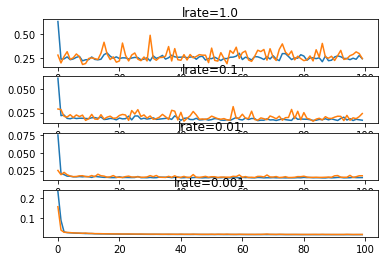

In [273]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no =410+(i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model_antm(X_train_rs_antm, y_train_antm, X_test_rs_antm, y_test_antm, learning_rates[i])
# show learning curves
plt.savefig('learning_rate_plot',dpi=1200)
plt.show()

In [293]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_lr1 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_lr1.summary()

simple_model_one_antm_lr1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_lr1 = simple_model_one_antm_lr1.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_lr1 = simple_model_one_antm_lr1.predict(X_test_rs_antm)



Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_435 (LSTM)             (None, 8)                 320       
                                                                 
 dense_235 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.0556 - mae: 0.0556 - val_loss: 0.0323 - val_mae: 0.0323
Epoch 2/5
52/52 [==============================] - 1s 12ms/step - loss: 0.0225 - mae: 0.0225 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 3/5
52/52 [==============================] - 1s 10ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0273 - val_mae: 0.0273
Epoch 4/5
52/52 [==============================] - 0s 10ms/s

In [294]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_lr2 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_lr2.summary()

simple_model_one_antm_lr2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_lr2 = simple_model_one_antm_lr2.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_lr2 = simple_model_one_antm_lr2.predict(X_test_rs_antm)



Model: "sequential_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_436 (LSTM)             (None, 8)                 320       
                                                                 
 dense_236 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 22ms/step - loss: 0.0922 - mae: 0.0922 - val_loss: 0.0239 - val_mae: 0.0239
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 3/5
52/52 [==============================] - 1s 10ms/step - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0174 - val_mae: 0.0174
Epoch 4/5
52/52 [==============================] - 0s 9ms/ste

In [295]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_lr3 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_lr3.summary()

simple_model_one_antm_lr3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_lr3 = simple_model_one_antm_lr3.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_lr3 = simple_model_one_antm_lr3.predict(X_test_rs_antm)



Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_437 (LSTM)             (None, 8)                 320       
                                                                 
 dense_237 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.2149 - mae: 0.2149 - val_loss: 0.1452 - val_mae: 0.1452
Epoch 2/5
52/52 [==============================] - 1s 10ms/step - loss: 0.1084 - mae: 0.1084 - val_loss: 0.0698 - val_mae: 0.0698
Epoch 3/5
52/52 [==============================] - 1s 10ms/step - loss: 0.0562 - mae: 0.0562 - val_loss: 0.0441 - val_mae: 0.0441
Epoch 4/5
52/52 [==============================] - 0s 10ms/s

### ASII

In [296]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_lr1 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_lr1.summary()

simple_model_one_asii_lr1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_lr1 = simple_model_one_asii_lr1.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_lr1 = simple_model_one_asii_lr1.predict(X_test_rs_asii)



Model: "sequential_238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_438 (LSTM)             (None, 8)                 320       
                                                                 
 dense_238 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.0788 - mae: 0.0788 - val_loss: 0.0363 - val_mae: 0.0363
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0400 - mae: 0.0400 - val_loss: 0.0378 - val_mae: 0.0378
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0389 - mae: 0.0389 - val_loss: 0.0332 - val_mae: 0.0332
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

In [297]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_lr2 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_lr2.summary()

simple_model_one_asii_lr2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_lr2 = simple_model_one_asii_lr2.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_lr2 = simple_model_one_asii_lr2.predict(X_test_rs_asii)



Model: "sequential_239"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_439 (LSTM)             (None, 8)                 320       
                                                                 
 dense_239 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.1394 - mae: 0.1394 - val_loss: 0.0469 - val_mae: 0.0469
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0387 - mae: 0.0387 - val_loss: 0.0362 - val_mae: 0.0362
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0363 - mae: 0.0363 - val_loss: 0.0369 - val_mae: 0.0369
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

In [298]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_lr3 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_lr3.summary()

simple_model_one_asii_lr3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_lr3 = simple_model_one_asii_lr3.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_lr3 = simple_model_one_asii_lr3.predict(X_test_rs_asii)



Model: "sequential_240"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_440 (LSTM)             (None, 8)                 320       
                                                                 
 dense_240 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 23ms/step - loss: 0.5062 - mae: 0.5062 - val_loss: 0.3515 - val_mae: 0.3515
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.2374 - mae: 0.2374 - val_loss: 0.1501 - val_mae: 0.1501
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.1017 - mae: 0.1017 - val_loss: 0.0674 - val_mae: 0.0674
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

### ICBP

In [299]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_lr1 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_lr1.summary()

simple_model_one_icbp_lr1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_lr1 = simple_model_one_icbp_lr1.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_lr1 = simple_model_one_icbp_lr1.predict(X_test_rs_icbp)



Model: "sequential_241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_441 (LSTM)             (None, 8)                 320       
                                                                 
 dense_241 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 20ms/step - loss: 0.0745 - mae: 0.0745 - val_loss: 0.0178 - val_mae: 0.0178
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0226 - mae: 0.0226 - val_loss: 0.0262 - val_mae: 0.0262
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0221 - mae: 0.0221 - val_loss: 0.0381 - val_mae: 0.0381
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

In [300]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_lr2 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_lr2.summary()

simple_model_one_icbp_lr2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_lr2 = simple_model_one_icbp_lr2.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_lr2 = simple_model_one_icbp_lr2.predict(X_test_rs_icbp)



Model: "sequential_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_442 (LSTM)             (None, 8)                 320       
                                                                 
 dense_242 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 18ms/step - loss: 0.1191 - mae: 0.1191 - val_loss: 0.0290 - val_mae: 0.0290
Epoch 2/5
52/52 [==============================] - 1s 11ms/step - loss: 0.0214 - mae: 0.0214 - val_loss: 0.0172 - val_mae: 0.0172
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0185 - mae: 0.0185 - val_loss: 0.0235 - val_mae: 0.0235
Epoch 4/5
52/52 [==============================] - 0s 9ms/ste

In [301]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_lr3 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_lr3.summary()

simple_model_one_icbp_lr3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_lr3 = simple_model_one_icbp_lr3.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_lr3 = simple_model_one_icbp_lr3.predict(X_test_rs_icbp)



Model: "sequential_243"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_443 (LSTM)             (None, 8)                 320       
                                                                 
 dense_243 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.3723 - mae: 0.3723 - val_loss: 0.2653 - val_mae: 0.2653
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.2005 - mae: 0.2005 - val_loss: 0.1281 - val_mae: 0.1281
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0817 - mae: 0.0817 - val_loss: 0.0516 - val_mae: 0.0516
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

### JSMR

In [302]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_lr1 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_lr1.summary()

simple_model_one_jsmr_lr1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_lr1 = simple_model_one_jsmr_lr1.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_lr1 = simple_model_one_jsmr_lr1.predict(X_test_rs_jsmr)



Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_444 (LSTM)             (None, 8)                 320       
                                                                 
 dense_244 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.0944 - mae: 0.0944 - val_loss: 0.0327 - val_mae: 0.0327
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0294 - mae: 0.0294 - val_loss: 0.0461 - val_mae: 0.0461
Epoch 3/5
52/52 [==============================] - 1s 11ms/step - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0386 - val_mae: 0.0386
Epoch 4/5
52/52 [==============================] - 0s 9ms/ste

In [303]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_lr2 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_lr2.summary()

simple_model_one_jsmr_lr2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_lr2 = simple_model_one_jsmr_lr2.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_lr2 = simple_model_one_jsmr_lr2.predict(X_test_rs_jsmr)



Model: "sequential_245"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_445 (LSTM)             (None, 8)                 320       
                                                                 
 dense_245 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 18ms/step - loss: 0.1299 - mae: 0.1299 - val_loss: 0.0353 - val_mae: 0.0353
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0326 - mae: 0.0326 - val_loss: 0.0292 - val_mae: 0.0292
Epoch 3/5
52/52 [==============================] - 0s 9ms/step - loss: 0.0297 - mae: 0.0297 - val_loss: 0.0259 - val_mae: 0.0259
Epoch 4/5
52/52 [==============================] - 0s 9ms/step

In [304]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_lr3 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_lr3.summary()

simple_model_one_jsmr_lr3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_lr3 = simple_model_one_jsmr_lr3.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_lr3 = simple_model_one_jsmr_lr3.predict(X_test_rs_jsmr)



Model: "sequential_246"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_446 (LSTM)             (None, 8)                 320       
                                                                 
 dense_246 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
52/52 [==============================] - 3s 19ms/step - loss: 0.4930 - mae: 0.4930 - val_loss: 0.3084 - val_mae: 0.3084
Epoch 2/5
52/52 [==============================] - 0s 9ms/step - loss: 0.1904 - mae: 0.1904 - val_loss: 0.1261 - val_mae: 0.1261
Epoch 3/5
52/52 [==============================] - 1s 11ms/step - loss: 0.0784 - mae: 0.0784 - val_loss: 0.0460 - val_mae: 0.0460
Epoch 4/5
52/52 [==============================] - 0s 9ms/ste

### MATRIKS EVALUASI

#### MAE

In [305]:

# Forecast
# mae score
print('lrarning rate 0.1')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_lr1, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_lr1, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_lr1, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_lr1, y_test_jsmr).round(2)))

print('lrarning rate 0.01')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_lr2, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_lr2, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_lr2, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_lr2, y_test_jsmr).round(2)))

print('lrarning rate 0.001')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_lr3, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_lr3, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_lr3, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_lr3, y_test_jsmr).round(2)))


lrarning rate 0.1
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.02
mae score jsmr: 0.02
lrarning rate 0.01
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.02
mae score jsmr: 0.03
lrarning rate 0.001
mae score antm: 0.03
mae score asii: 0.04
mae score icbp: 0.03
mae score jsmr: 0.04


#### R2 score

In [306]:
from sklearn.metrics import r2_score

# Forecast
# R2 score
print('lrarning rate 0.1')
print("R2 score antm: "+str(r2_score(preds_one_antm_lr1, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_lr1, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_lr1, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_lr1, y_test_jsmr).round(2)))

print('lrarning rate 0.01')
print("R2 score antm: "+str(r2_score(preds_one_antm_lr2, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_lr2, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_lr2, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_lr2, y_test_jsmr).round(2)))

print('lrarning rate 0.001')
print("R2 score antm: "+str(r2_score(preds_one_antm_lr3, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_lr3, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_lr3, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_lr3, y_test_jsmr).round(2)))



lrarning rate 0.1
R2 score antm: 0.97
R2 score asii: 0.96
R2 score icbp: 0.99
R2 score jsmr: 0.98
lrarning rate 0.01
R2 score antm: 0.98
R2 score asii: 0.95
R2 score icbp: 0.99
R2 score jsmr: 0.97
lrarning rate 0.001
R2 score antm: 0.95
R2 score asii: 0.92
R2 score icbp: 0.97
R2 score jsmr: 0.93


#### MAPE

In [307]:
from sklearn.metrics import mean_absolute_percentage_error

# Forecast
# mape score
print('lrarning rate 0.1')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_one_antm_lr1, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_one_asii_lr1, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_lr1, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_lr1, y_test_jsmr).round(2)))

print('lrarning rate 0.01')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_one_antm_lr2, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_one_asii_lr2, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_lr2, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_lr2, y_test_jsmr).round(2)))

print('lrarning rate 0.001')
print("mape score antm: "+str(mean_absolute_percentage_error(preds_one_antm_lr3, y_test_antm).round(2)))
print("mape score asii: "+str(mean_absolute_percentage_error(preds_one_asii_lr3, y_test_asii).round(2)))
print("mape score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_lr3, y_test_icbp).round(2)))
print("mape score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_lr3, y_test_jsmr).round(2)))



lrarning rate 0.1
mape score antm: 0.1
mape score asii: 0.07
mape score icbp: 0.15
mape score jsmr: 0.05
lrarning rate 0.01
mape score antm: 0.08
mape score asii: 0.07
mape score icbp: 0.08
mape score jsmr: 0.06
lrarning rate 0.001
mape score antm: 0.11
mape score asii: 0.09
mape score icbp: 0.09
mape score jsmr: 0.09


## TUNING EPOCH

### ANTM

In [16]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_epoch25 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_epoch25.summary()

simple_model_one_antm_epoch25.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_epoch25 = simple_model_one_antm_epoch25.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=25,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_epoch25 = simple_model_one_antm_epoch25.predict(X_test_rs_antm)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
52/52 [==============================] - 3s 22ms/step - loss: 0.0843 - mae: 0.0843 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 2/25
52/52 [==============================] - 0s 8ms/step - loss: 0.0243 - mae: 0.0243 - val_loss: 0.0248 - val_mae: 0.0248
Epoch 3/25
52/52 [==============================] - 0s 9ms/step - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 4/25
52/52 [==============================] - 0s 9ms/step

In [25]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_epoch50 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_epoch50.summary()

simple_model_one_antm_epoch50.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_epoch50 = simple_model_one_antm_epoch50.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=50,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_epoch50 = simple_model_one_antm_epoch50.predict(X_test_rs_antm)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 8)                 320       
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
52/52 [==============================] - 3s 17ms/step - loss: 0.0749 - mae: 0.0749 - val_loss: 0.0259 - val_mae: 0.0259
Epoch 2/50
52/52 [==============================] - 0s 8ms/step - loss: 0.0226 - mae: 0.0226 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3/50
52/52 [==============================] - 0s 8ms/step - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0248 - val_mae: 0.0248
Epoch 4/50
52/52 [==============================] - 0s 8ms/st

In [26]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_epoch100 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_epoch100.summary()

simple_model_one_antm_epoch100.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_epoch100 = simple_model_one_antm_epoch100.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_epoch100 = simple_model_one_antm_epoch100.predict(X_test_rs_antm)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 8)                 320       
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 17ms/step - loss: 0.0808 - mae: 0.0808 - val_loss: 0.0222 - val_mae: 0.0222
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.0222 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0170 - val_mae: 0.0170
Epoch 4/100
52/52 [==============================] - 1s 1

### ASII

In [27]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_epoch25 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_epoch25.summary()

simple_model_one_asii_epoch25.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_epoch25 = simple_model_one_asii_epoch25.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=25,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_epoch25 = simple_model_one_asii_epoch25.predict(X_test_rs_asii)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8)                 320       
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
52/52 [==============================] - 3s 20ms/step - loss: 0.1379 - mae: 0.1379 - val_loss: 0.0437 - val_mae: 0.0437
Epoch 2/25
52/52 [==============================] - 0s 9ms/step - loss: 0.0395 - mae: 0.0395 - val_loss: 0.0369 - val_mae: 0.0369
Epoch 3/25
52/52 [==============================] - 0s 9ms/step - loss: 0.0376 - mae: 0.0376 - val_loss: 0.0392 - val_mae: 0.0392
Epoch 4/25
52/52 [==============================] - 0s 9ms/s

In [28]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_epoch50 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_epoch50.summary()

simple_model_one_asii_epoch50.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_epoch50 = simple_model_one_asii_epoch50.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=50,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_epoch50 = simple_model_one_asii_epoch50.predict(X_test_rs_asii)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 8)                 320       
                                                                 
 dense_12 (Dense)            (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
52/52 [==============================] - 3s 17ms/step - loss: 0.1885 - mae: 0.1885 - val_loss: 0.0500 - val_mae: 0.0500
Epoch 2/50
52/52 [==============================] - 0s 9ms/step - loss: 0.0420 - mae: 0.0420 - val_loss: 0.0385 - val_mae: 0.0385
Epoch 3/50
52/52 [==============================] - ETA: 0s - loss: 0.0372 - mae: 0.037 - 0s 8ms/step - loss: 0.0368 - mae: 0.0368 - val_loss: 0.0347 - val_mae: 0.0347
Epoch 4/50
52/52 [====

In [18]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_epoch100 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_epoch100.summary()

simple_model_one_asii_epoch100.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_epoch100 = simple_model_one_asii_epoch100.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_epoch100 = simple_model_one_asii_epoch100.predict(X_test_rs_asii)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 320       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 20ms/step - loss: 0.1661 - mae: 0.1661 - val_loss: 0.0469 - val_mae: 0.0469
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0389 - mae: 0.0389 - val_loss: 0.0356 - val_mae: 0.0356
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0362 - mae: 0.0362 - val_loss: 0.0433 - val_mae: 0.0433
Epoch 4/100
52/52 [==============================] - 0s 8m

### ICBP

In [19]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_epoch25 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_epoch25.summary()

simple_model_one_icbp_epoch25.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_epoch25 = simple_model_one_icbp_epoch25.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=25,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_epoch25 = simple_model_one_icbp_epoch25.predict(X_test_rs_icbp)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 8)                 320       
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
52/52 [==============================] - 3s 18ms/step - loss: 0.1508 - mae: 0.1508 - val_loss: 0.0237 - val_mae: 0.0237
Epoch 2/25
52/52 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.0222 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 3/25
52/52 [==============================] - 0s 8ms/step - loss: 0.0186 - mae: 0.0186 - val_loss: 0.0163 - val_mae: 0.0163
Epoch 4/25
52/52 [==============================] - 0s 9ms/st

In [20]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_epoch50 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_epoch50.summary()

simple_model_one_icbp_epoch50.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_epoch50 = simple_model_one_icbp_epoch50.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=50,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_epoch50 = simple_model_one_icbp_epoch50.predict(X_test_rs_icbp)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8)                 320       
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
52/52 [==============================] - 3s 17ms/step - loss: 0.0768 - mae: 0.0768 - val_loss: 0.0227 - val_mae: 0.0227
Epoch 2/50
52/52 [==============================] - 0s 8ms/step - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 3/50
52/52 [==============================] - 0s 8ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0285 - val_mae: 0.0285
Epoch 4/50
52/52 [==============================] - 0s 9ms/st

In [21]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_epoch100 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_epoch100.summary()

simple_model_one_icbp_epoch100.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_epoch100 = simple_model_one_icbp_epoch100.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_epoch100 = simple_model_one_icbp_epoch100.predict(X_test_rs_icbp)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 320       
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 4s 18ms/step - loss: 0.1292 - mae: 0.1292 - val_loss: 0.0277 - val_mae: 0.0277
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0225 - mae: 0.0225 - val_loss: 0.0207 - val_mae: 0.0207
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0187 - mae: 0.0187 - val_loss: 0.0162 - val_mae: 0.0162
Epoch 4/100
52/52 [==============================] - 0s 9m

### JSMR

In [22]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_epoch25 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_epoch25.summary()

simple_model_one_jsmr_epoch25.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_epoch25 = simple_model_one_jsmr_epoch25.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=25,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_epoch25 = simple_model_one_jsmr_epoch25.predict(X_test_rs_jsmr)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8)                 320       
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
52/52 [==============================] - 3s 21ms/step - loss: 0.1054 - mae: 0.1054 - val_loss: 0.0310 - val_mae: 0.0310
Epoch 2/25
52/52 [==============================] - 1s 10ms/step - loss: 0.0327 - mae: 0.0327 - val_loss: 0.0263 - val_mae: 0.0263
Epoch 3/25
52/52 [==============================] - 0s 8ms/step - loss: 0.0277 - mae: 0.0277 - val_loss: 0.0279 - val_mae: 0.0279
Epoch 4/25
52/52 [==============================] - 0s 9ms/s

In [23]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_epoch50 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_epoch50.summary()

simple_model_one_jsmr_epoch50.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_epoch50 = simple_model_one_jsmr_epoch50.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=50,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_epoch50 = simple_model_one_jsmr_epoch50.predict(X_test_rs_jsmr)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 8)                 320       
                                                                 
 dense_7 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
52/52 [==============================] - 5s 37ms/step - loss: 0.1368 - mae: 0.1368 - val_loss: 0.0413 - val_mae: 0.0413
Epoch 2/50
52/52 [==============================] - 1s 11ms/step - loss: 0.0332 - mae: 0.0332 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 3/50
52/52 [==============================] - 1s 13ms/step - loss: 0.0305 - mae: 0.0305 - val_loss: 0.0267 - val_mae: 0.0267
Epoch 4/50
52/52 [==============================] - 1s 13ms

In [24]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_epoch100 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_epoch100.summary()

simple_model_one_jsmr_epoch100.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_epoch100 = simple_model_one_jsmr_epoch100.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_epoch100 = simple_model_one_jsmr_epoch100.predict(X_test_rs_jsmr)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8)                 320       
                                                                 
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 18ms/step - loss: 0.1030 - mae: 0.1030 - val_loss: 0.0385 - val_mae: 0.0385
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0308 - val_mae: 0.0308
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0318 - mae: 0.0318 - val_loss: 0.0280 - val_mae: 0.0280
Epoch 4/100
52/52 [==============================] - 0s 9m

### MAtRIKS EVALUASI

#### MAE

In [339]:

# Forecast
# mae score
print('lrarning rate 0.1')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_epoch25, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_epoch25, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_epoch25, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_epoch25, y_test_jsmr).round(2)))

print('lrarning rate 0.01')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_epoch50, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_epoch50, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_epoch50, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_epoch50, y_test_jsmr).round(2)))

print('lrarning rate 0.001')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_epoch100, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_epoch100, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_epoch100, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_epoch100, y_test_jsmr).round(2)))


lrarning rate 0.1
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.02
mae score jsmr: 0.02
lrarning rate 0.01
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.01
mae score jsmr: 0.02
lrarning rate 0.001
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.01
mae score jsmr: 0.02


#### R2 SKOR

In [340]:

# Forecast
# R2 score
print('epoch 25')
print("R2 score antm: "+str(r2_score(preds_one_antm_epoch25, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_epoch25, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_epoch25, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_epoch25, y_test_jsmr).round(2)))

print('epoch 50')
print("R2 score antm: "+str(r2_score(preds_one_antm_epoch50, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_epoch50, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_epoch50, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_epoch50, y_test_jsmr).round(2)))

print('epoch 100')
print("R2 score antm: "+str(r2_score(preds_one_antm_epoch100, y_test_antm).round(2)))
print("R2 score asii: "+str(r2_score(preds_one_asii_epoch100, y_test_asii).round(2)))
print("R2 score icbp: "+str(r2_score(preds_one_icbp_epoch100, y_test_icbp).round(2)))
print("R2 score jsmr: "+str(r2_score(preds_one_jsmr_epoch100, y_test_jsmr).round(2)))


epoch 25
R2 score antm: 0.98
R2 score asii: 0.96
R2 score icbp: 0.99
R2 score jsmr: 0.98
epoch 50
R2 score antm: 0.98
R2 score asii: 0.96
R2 score icbp: 0.99
R2 score jsmr: 0.98
epoch 100
R2 score antm: 0.98
R2 score asii: 0.96
R2 score icbp: 0.99
R2 score jsmr: 0.98


#### MAPE

In [341]:
from sklearn.metrics import mean_absolute_percentage_error
# Forecast
# MAPE score
print('epoch 25')
print("MAPE score antm: "+str(mean_absolute_percentage_error(preds_one_antm_epoch25, y_test_antm).round(2)))
print("MAPE score asii: "+str(mean_absolute_percentage_error(preds_one_asii_epoch25, y_test_asii).round(2)))
print("MAPE score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_epoch25, y_test_icbp).round(2)))
print("MAPE score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_epoch25, y_test_jsmr).round(2)))

print('epoch 50')
print("MAPE score antm: "+str(mean_absolute_percentage_error(preds_one_antm_epoch50, y_test_antm).round(2)))
print("MAPE score asii: "+str(mean_absolute_percentage_error(preds_one_asii_epoch50, y_test_asii).round(2)))
print("MAPE score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_epoch50, y_test_icbp).round(2)))
print("MAPE score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_epoch50, y_test_jsmr).round(2)))

print('epoch 100')
print("MAPE score antm: "+str(mean_absolute_percentage_error(preds_one_antm_epoch100, y_test_antm).round(2)))
print("MAPE score asii: "+str(mean_absolute_percentage_error(preds_one_asii_epoch100, y_test_asii).round(2)))
print("MAPE score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_epoch100, y_test_icbp).round(2)))
print("MAPE score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_epoch100, y_test_jsmr).round(2)))


epoch 25
MAPE score antm: 0.2
MAPE score asii: 0.06
MAPE score icbp: 0.05
MAPE score jsmr: 0.05
epoch 50
MAPE score antm: 0.15
MAPE score asii: 0.06
MAPE score icbp: 0.06
MAPE score jsmr: 0.05
epoch 100
MAPE score antm: 0.07
MAPE score asii: 0.06
MAPE score icbp: 0.05
MAPE score jsmr: 0.05


## TUNING NEURON

### ANTM

In [353]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_unit16 = Sequential([
  LSTM(16, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_unit16.summary()

simple_model_one_antm_unit16.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_unit16 = simple_model_one_antm_unit16.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_unit16 = simple_model_one_antm_unit16.predict(X_test_rs_antm)

Model: "sequential_279"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_479 (LSTM)             (None, 16)                1152      
                                                                 
 dense_279 (Dense)           (None, 6)                 102       
                                                                 
Total params: 1,254
Trainable params: 1,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 20ms/step - loss: 0.0557 - mae: 0.0557 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 2/100
52/52 [==============================] - 1s 10ms/step - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3/100
52/52 [==============================] - 1s 10ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0175 - val_mae: 0.0175
Epoch 4/100
52/52 [==============================]

In [354]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_unit8 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_unit8.summary()

simple_model_one_antm_unit8.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_unit8 = simple_model_one_antm_unit8.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_unit8 = simple_model_one_antm_unit8.predict(X_test_rs_antm)

Model: "sequential_280"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_480 (LSTM)             (None, 8)                 320       
                                                                 
 dense_280 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 20ms/step - loss: 0.0769 - mae: 0.0769 - val_loss: 0.0285 - val_mae: 0.0285
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0241 - mae: 0.0241 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0190 - mae: 0.0190 - val_loss: 0.0180 - val_mae: 0.0180
Epoch 4/100
52/52 [==============================] - 0s 

In [355]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_antm_unit64 = Sequential([
  LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_antm.shape[1]),
])

simple_model_one_antm_unit64.summary()

simple_model_one_antm_unit64.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_antm_unit64 = simple_model_one_antm_unit64.fit(X_train_rs_antm, y_train_antm,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_antm_unit64 = simple_model_one_antm_unit64.predict(X_test_rs_antm)

Model: "sequential_281"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_481 (LSTM)             (None, 64)                16896     
                                                                 
 dense_281 (Dense)           (None, 6)                 390       
                                                                 
Total params: 17,286
Trainable params: 17,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 6s 68ms/step - loss: 0.0581 - mae: 0.0581 - val_loss: 0.0317 - val_mae: 0.0317
Epoch 2/100
52/52 [==============================] - 3s 58ms/step - loss: 0.0252 - mae: 0.0252 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 3/100
52/52 [==============================] - 3s 58ms/step - loss: 0.0183 - mae: 0.0183 - val_loss: 0.0176 - val_mae: 0.0176
Epoch 4/100
52/52 [=============================

### ASII

In [356]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_unit16 = Sequential([
  LSTM(16, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_unit16.summary()

simple_model_one_asii_unit16.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_unit16 = simple_model_one_asii_unit16.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_unit16 = simple_model_one_asii_unit16.predict(X_test_rs_asii)

Model: "sequential_282"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_482 (LSTM)             (None, 16)                1152      
                                                                 
 dense_282 (Dense)           (None, 6)                 102       
                                                                 
Total params: 1,254
Trainable params: 1,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 18ms/step - loss: 0.1157 - mae: 0.1157 - val_loss: 0.0447 - val_mae: 0.0447
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0379 - mae: 0.0379 - val_loss: 0.0363 - val_mae: 0.0363
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0356 - mae: 0.0356 - val_loss: 0.0366 - val_mae: 0.0366
Epoch 4/100
52/52 [==============================] -

In [357]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_unit8 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_unit8.summary()

simple_model_one_asii_unit8.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_unit8 = simple_model_one_asii_unit8.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_unit8 = simple_model_one_asii_unit8.predict(X_test_rs_asii)

Model: "sequential_283"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_483 (LSTM)             (None, 8)                 320       
                                                                 
 dense_283 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 19ms/step - loss: 0.1417 - mae: 0.1417 - val_loss: 0.0481 - val_mae: 0.0481
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0403 - mae: 0.0403 - val_loss: 0.0362 - val_mae: 0.0362
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0356 - mae: 0.0356 - val_loss: 0.0344 - val_mae: 0.0344
Epoch 4/100
52/52 [==============================] - 0s 

In [358]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_asii_unit64 = Sequential([
  LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_asii.shape[1]),
])

simple_model_one_asii_unit64.summary()

simple_model_one_asii_unit64.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_asii_unit64 = simple_model_one_asii_unit64.fit(X_train_rs_asii, y_train_asii,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_asii_unit64 = simple_model_one_asii_unit64.predict(X_test_rs_asii)

Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_484 (LSTM)             (None, 64)                16896     
                                                                 
 dense_284 (Dense)           (None, 6)                 390       
                                                                 
Total params: 17,286
Trainable params: 17,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 6s 72ms/step - loss: 0.0868 - mae: 0.0868 - val_loss: 0.0636 - val_mae: 0.0636
Epoch 2/100
52/52 [==============================] - 3s 61ms/step - loss: 0.0430 - mae: 0.0430 - val_loss: 0.0408 - val_mae: 0.0408
Epoch 3/100
52/52 [==============================] - 3s 63ms/step - loss: 0.0353 - mae: 0.0353 - val_loss: 0.0354 - val_mae: 0.0354
Epoch 4/100
52/52 [=============================

### ICBP

In [359]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_unit8 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_unit8.summary()

simple_model_one_icbp_unit8.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_unit8 = simple_model_one_icbp_unit8.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_unit8 = simple_model_one_icbp_unit8.predict(X_test_rs_icbp)

Model: "sequential_285"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_485 (LSTM)             (None, 8)                 320       
                                                                 
 dense_285 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 19ms/step - loss: 0.1369 - mae: 0.1369 - val_loss: 0.0305 - val_mae: 0.0305
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.0222 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0184 - mae: 0.0184 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 4/100
52/52 [==============================] - 0s 

In [360]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_unit16 = Sequential([
  LSTM(16, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_unit16.summary()

simple_model_one_icbp_unit16.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_unit16 = simple_model_one_icbp_unit16.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_unit16 = simple_model_one_icbp_unit16.predict(X_test_rs_icbp)

Model: "sequential_286"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_486 (LSTM)             (None, 16)                1152      
                                                                 
 dense_286 (Dense)           (None, 6)                 102       
                                                                 
Total params: 1,254
Trainable params: 1,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 19ms/step - loss: 0.1069 - mae: 0.1069 - val_loss: 0.0242 - val_mae: 0.0242
Epoch 2/100
52/52 [==============================] - 1s 11ms/step - loss: 0.0219 - mae: 0.0219 - val_loss: 0.0258 - val_mae: 0.0258
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0189 - mae: 0.0189 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 4/100
52/52 [==============================] 

In [361]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_icbp_unit64 = Sequential([
  LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_icbp.shape[1]),
])

simple_model_one_icbp_unit64.summary()

simple_model_one_icbp_unit64.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_icbp_unit64 = simple_model_one_icbp_unit64.fit(X_train_rs_icbp, y_train_icbp,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_icbp_unit64 = simple_model_one_icbp_unit64.predict(X_test_rs_icbp)

Model: "sequential_287"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_487 (LSTM)             (None, 64)                16896     
                                                                 
 dense_287 (Dense)           (None, 6)                 390       
                                                                 
Total params: 17,286
Trainable params: 17,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 6s 74ms/step - loss: 0.0591 - mae: 0.0591 - val_loss: 0.0336 - val_mae: 0.0336
Epoch 2/100
52/52 [==============================] - 3s 65ms/step - loss: 0.0300 - mae: 0.0300 - val_loss: 0.0211 - val_mae: 0.0211
Epoch 3/100
52/52 [==============================] - 3s 66ms/step - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0180 - val_mae: 0.0180
Epoch 4/100
52/52 [=============================

### JSMR

In [362]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_unit8 = Sequential([
  LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_unit8.summary()

simple_model_one_jsmr_unit8.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_unit8 = simple_model_one_jsmr_unit8.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_unit8 = simple_model_one_jsmr_unit8.predict(X_test_rs_jsmr)

Model: "sequential_288"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_488 (LSTM)             (None, 8)                 320       
                                                                 
 dense_288 (Dense)           (None, 6)                 54        
                                                                 
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 19ms/step - loss: 0.1613 - mae: 0.1613 - val_loss: 0.0336 - val_mae: 0.0336
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0305 - mae: 0.0305 - val_loss: 0.0340 - val_mae: 0.0340
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0286 - mae: 0.0286 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 4/100
52/52 [==============================] - 0s 

In [363]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_unit16 = Sequential([
  LSTM(16, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_unit16.summary()

simple_model_one_jsmr_unit16.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=[
           'mae',
           ],
)

smod_history_one_jsmr_unit16 = simple_model_one_jsmr_unit16.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_unit16 = simple_model_one_jsmr_unit16.predict(X_test_rs_jsmr)

Model: "sequential_289"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_489 (LSTM)             (None, 16)                1152      
                                                                 
 dense_289 (Dense)           (None, 6)                 102       
                                                                 
Total params: 1,254
Trainable params: 1,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 19ms/step - loss: 0.0959 - mae: 0.0959 - val_loss: 0.0302 - val_mae: 0.0302
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0296 - mae: 0.0296 - val_loss: 0.0293 - val_mae: 0.0293
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0317 - mae: 0.0317 - val_loss: 0.0360 - val_mae: 0.0360
Epoch 4/100
52/52 [==============================] -

In [364]:
import random
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model_one_jsmr_unit64 = Sequential([
  LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train_jsmr.shape[1]),
])

simple_model_one_jsmr_unit64.summary()

simple_model_one_jsmr_unit64.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mae'],
)

smod_history_one_jsmr_unit64 = simple_model_one_jsmr_unit64.fit(X_train_rs_jsmr, y_train_jsmr,
          validation_split=0.2,
          epochs=100,
          batch_size=batch_size,
          shuffle = True
)

preds_one_jsmr_unit64 = simple_model_one_jsmr_unit64.predict(X_test_rs_jsmr)

Model: "sequential_290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_490 (LSTM)             (None, 64)                16896     
                                                                 
 dense_290 (Dense)           (None, 6)                 390       
                                                                 
Total params: 17,286
Trainable params: 17,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 6s 74ms/step - loss: 0.0725 - mae: 0.0725 - val_loss: 0.0302 - val_mae: 0.0302
Epoch 2/100
52/52 [==============================] - 3s 52ms/step - loss: 0.0344 - mae: 0.0344 - val_loss: 0.0376 - val_mae: 0.0376
Epoch 3/100
52/52 [==============================] - 3s 57ms/step - loss: 0.0304 - mae: 0.0304 - val_loss: 0.0451 - val_mae: 0.0451
Epoch 4/100
52/52 [=============================

### MATRIKS EVALUASI

#### MAE

In [365]:
# Forecast
# mae score
print('neuron 8')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_unit8, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_unit8, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_unit8, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_unit8, y_test_jsmr).round(2)))

print('neuron 16')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_unit16, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_unit16, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_unit16, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_unit16, y_test_jsmr).round(2)))

print('neuron 64')
print("mae score antm: "+str(mean_absolute_error(preds_one_antm_unit64, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_error(preds_one_asii_unit64, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_error(preds_one_icbp_unit64, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_error(preds_one_jsmr_unit64, y_test_jsmr).round(2)))

neuron 8
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.01
mae score jsmr: 0.02
neuron 16
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.02
mae score jsmr: 0.02
neuron 64
mae score antm: 0.02
mae score asii: 0.03
mae score icbp: 0.02
mae score jsmr: 0.02


#### R2 score

In [366]:
# Forecast
# mae score
print('neuron 8')
print("mae score antm: "+str(r2_score(preds_one_antm_unit8, y_test_antm).round(2)))
print("mae score asii: "+str(r2_score(preds_one_asii_unit8, y_test_asii).round(2)))
print("mae score icbp: "+str(r2_score(preds_one_icbp_unit8, y_test_icbp).round(2)))
print("mae score jsmr: "+str(r2_score(preds_one_jsmr_unit8, y_test_jsmr).round(2)))

print('neuron 16')
print("mae score antm: "+str(r2_score(preds_one_antm_unit16, y_test_antm).round(2)))
print("mae score asii: "+str(r2_score(preds_one_asii_unit16, y_test_asii).round(2)))
print("mae score icbp: "+str(r2_score(preds_one_icbp_unit16, y_test_icbp).round(2)))
print("mae score jsmr: "+str(r2_score(preds_one_jsmr_unit16, y_test_jsmr).round(2)))

print('neuron 64')
print("mae score antm: "+str(r2_score(preds_one_antm_unit64, y_test_antm).round(2)))
print("mae score asii: "+str(r2_score(preds_one_asii_unit64, y_test_asii).round(2)))
print("mae score icbp: "+str(r2_score(preds_one_icbp_unit64, y_test_icbp).round(2)))
print("mae score jsmr: "+str(r2_score(preds_one_jsmr_unit64, y_test_jsmr).round(2)))

neuron 8
mae score antm: 0.98
mae score asii: 0.96
mae score icbp: 0.99
mae score jsmr: 0.98
neuron 16
mae score antm: 0.98
mae score asii: 0.96
mae score icbp: 0.99
mae score jsmr: 0.98
neuron 64
mae score antm: 0.98
mae score asii: 0.96
mae score icbp: 0.99
mae score jsmr: 0.98


#### MAPE

In [367]:
# Forecast
# mae score
print('neuron 8')
print("mae score antm: "+str(mean_absolute_percentage_error(preds_one_antm_unit8, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_percentage_error(preds_one_asii_unit8, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_unit8, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_unit8, y_test_jsmr).round(2)))

print('neuron 16')
print("mae score antm: "+str(mean_absolute_percentage_error(preds_one_antm_unit16, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_percentage_error(preds_one_asii_unit16, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_unit16, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_unit16, y_test_jsmr).round(2)))

print('neuron 64')
print("mae score antm: "+str(mean_absolute_percentage_error(preds_one_antm_unit64, y_test_antm).round(2)))
print("mae score asii: "+str(mean_absolute_percentage_error(preds_one_asii_unit64, y_test_asii).round(2)))
print("mae score icbp: "+str(mean_absolute_percentage_error(preds_one_icbp_unit64, y_test_icbp).round(2)))
print("mae score jsmr: "+str(mean_absolute_percentage_error(preds_one_jsmr_unit64, y_test_jsmr).round(2)))

neuron 8
mae score antm: 0.07
mae score asii: 0.06
mae score icbp: 0.04
mae score jsmr: 0.07
neuron 16
mae score antm: 0.07
mae score asii: 0.07
mae score icbp: 0.05
mae score jsmr: 0.35
neuron 64
mae score antm: 0.07
mae score asii: 0.06
mae score icbp: 0.07
mae score jsmr: 0.06
